<a href="https://colab.research.google.com/github/elhamod/BA865-2024/blob/main/Hands-on/Audio%20with%20RNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook we will build a speech recognition model.  

In [ ]:
import os
import librosa   #for audio processing
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

In the next section, you will define your experiment's parameters and model's hyperparameters as flags here. Use these flags in your code so you can switch between experiemnts easily.

In [ ]:
number_of_samples = {'yes':2000, 'no': 2000} # We will try to classify between two classes. This defines the number of samples per class.
noise = 0.0 # If not zero, it makes the audio proportionally noisier (range: 0-1)

Next, we'll download and unzip the dataset of speech commands from tensorflow: http://download.tensorflow.org/data/speech_commands_v0.01.tar.gz

In [ ]:
from pathlib import Path

my_file = Path("/content/speech_commands/")
if not my_file.exists():
  !wget http://download.tensorflow.org/data/speech_commands_v0.01.tar.gz
  !mkdir speech_commands
  !tar -C ./speech_commands -xf speech_commands_v0.01.tar.gz

--2024-04-11 17:10:00--  http://download.tensorflow.org/data/speech_commands_v0.01.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.250.101.207, 142.250.141.207, 142.251.2.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|142.250.101.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1489096277 (1.4G) [application/gzip]
Saving to: ‘speech_commands_v0.01.tar.gz’

speech_commands_v0. 100%[===================>]   1.39G   113MB/s    in 14s     

2024-04-11 17:10:14 (100 MB/s) - ‘speech_commands_v0.01.tar.gz’ saved [1489096277/1489096277]



Let's plot the waveform of an example spoken command. You may add noise if you want!

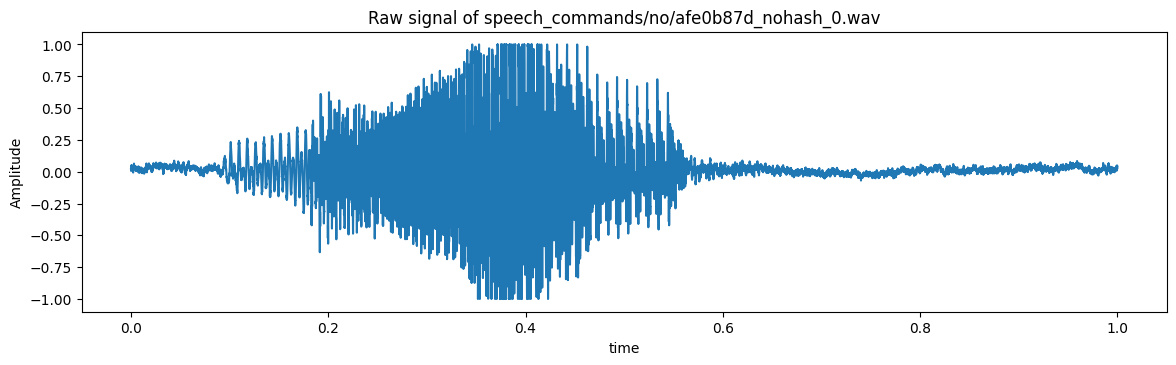

In [ ]:
# parameters
train_path = 'speech_commands/'
filename = train_path+'no/afe0b87d_nohash_0.wav'

samples, sample_rate = librosa.load(filename, sr = 16000)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw signal of ' + filename)
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')

samples_ = samples+noise*np.random.randn(*samples.shape)
samples_ = samples_/max(samples_)
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples_)

ipd.Audio(samples_,rate=sample_rate,autoplay=True)

Below we load the data and print the number of examples.

In [ ]:
directory = 'speech_commands/'
all_wavs = [] # The inputs
all_labs = [] # The outputs

# create the dataset as arrays
for label in number_of_samples.keys():

    wavs = [f for f in os.listdir(directory + label) if f.endswith('.wav')]
    for wav in wavs:
        samples, sample_rate = librosa.load(directory + label + '/' + wav, sr = 16000)
        if(len(samples)== 16000):
            all_wavs.append(samples)
            all_labs.append(label)

all_wavs = torch.tensor(all_wavs)

# normalize
# means = all_wavs.mean()
# stds = all_wavs.std()
# all_wavs = (all_wavs - means) / stds

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
all_labs_encoded = le.fit_transform(all_labs)
all_labs_encoded = torch.LongTensor(all_labs_encoded)
print("Total number of samples:", len(all_wavs))

Total number of samples: 4255


**Task 1: Build an audio classifier**

**Task2: Learn a non-linear representation of the audio**